## 📘 Introducción

El presente análisis tiene como objetivo **identificar tendencias relevantes** dentro de un conjunto de datos relacionado con la venta de perfumes. A través de técnicas de análisis exploratorio, se busca entender el comportamiento de productos en términos de **ventas**, **disponibilidad de inventario** y **preferencias del consumidor**.

El dataset utilizado contiene información detallada sobre diferentes marcas, títulos de productos, unidades vendidas y stock disponible, lo que permite responder preguntas clave como:

- ¿Qué productos presentan alta demanda pero bajo inventario?
- ¿Existen perfumes con bajo nivel de ventas pero alto volumen de inventario?
- ¿Cuáles son las marcas con mayor o menor rotación?
- ¿Se pueden detectar patrones de bajo rendimiento para tomar decisiones de negocio?

Este estudio se orienta a generar **insights accionables** para optimizar el manejo del inventario, mejorar la estrategia de ventas y facilitar una toma de decisiones informada en función de los datos disponibles.

> 🧠 *La información extraída de este análisis puede ser clave para aumentar la rentabilidad del catálogo, reducir pérdidas por exceso de stock y mejorar la alineación entre la oferta de productos y la demanda real del mercado.*




In [2]:
#Importando Librerias y selecionando carpeta del DataFrame
import pandas as pd
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib.ticker as mtick
from unidecode import unidecode
os.chdir('C:/Users/Admin/Documents/Pandas_Archivos')

In [3]:
dfmen=pd.read_csv("ebay_mens_perfume.csv")

## Visualizando el Dataframe

In [5]:
#Vista General del Dataframe
dfmen.info

<bound method DataFrame.info of               brand                                              title  \
0              Dior  Christian Dior Sauvage Men's EDP 3.4 oz Fragra...   
1           AS SHOW  A-v-entus Eau de Parfum 3.3 oz 100ML Millesime...   
2         Unbranded                   HOGO BOSS cologne For Men 3.4 oz   
3    Giorgio Armani  Acqua Di Gio by Giorgio Armani 6.7 Fl oz Eau D...   
4           Lattafa  Lattafa Men's Hayaati Al Maleky EDP Spray 3.4 ...   
..              ...                                                ...   
995           GUESS  Guess 1981 by Guess cologne for men EDT 3.3 / ...   
996           Armaf  Club de Nuit Intense by Armaf cologne for men ...   
997    Paco Rabanne  Invictus by Paco Rabanne for Men EDT Spray 3.4...   
998          Lomani  Lomani EDT Cologne 3.4 oz Men - Authentic, Bra...   
999    Estee Lauder  Beyond Paradise by Estee Lauder for Men Cologn...   

                type   price priceWithCurrency  available  \
0      Eau de Parf

In [6]:
# Identificando anomalias en los tipos de datos
dfmen.dtypes

brand                 object
title                 object
type                  object
price                float64
priceWithCurrency     object
available            float64
availableText         object
sold                 float64
lastUpdated           object
itemLocation          object
dtype: object

In [7]:
# Cargando el Dataframe de Perfumes femeninos
dfwomen=pd.read_csv("ebay_womens_perfume.csv")


In [8]:
# Agregando columna "Mujer" para identificar el tipo de perfume segun el genero
dfwomen["Gender"]="Women"

In [9]:
# Agregando columna "Mujer" para identificar el tipo de perfume segun el genero
dfmen["Gender"]="Men"

In [10]:
# Uniendo los dos dataframes el masculino y femenino para hacer un analisis general de negocio
df= pd.concat([dfmen,dfwomen], ignore_index=True)

# Limpiando el Dataframe

In [12]:
#Normalizando los titulos para evitar duplicados
df['title'] = df['title'].str.lstrip('*').str.capitalize()


In [13]:
#  Quitar zonas horarias tipo PDT, GMT, etc.
df["lastUpdated"] = df["lastUpdated"].str.replace(r"\s[A-Z]{3}$", "", regex=True)

#  Convertir a datetime detectando automáticamente formatos mixtos
df["lastUpdated"] = pd.to_datetime(df["lastUpdated"], format="mixed", errors="coerce", dayfirst=True)



In [14]:
df.dtypes

brand                        object
title                        object
type                         object
price                       float64
priceWithCurrency            object
available                   float64
availableText                object
sold                        float64
lastUpdated          datetime64[ns]
itemLocation                 object
Gender                       object
dtype: object

In [15]:
# Ver la suma de valores nulos por columna
df.isnull().sum() 

brand                  2
title                  0
type                   5
price                  0
priceWithCurrency      0
available            242
availableText         11
sold                  22
lastUpdated          126
itemLocation           0
Gender                 0
dtype: int64

In [16]:
#Rellenar los valores nulos (no habia stock) con 0 para una mejor lectura y analisis correcto
df["available"]=df["available"].fillna(0)

In [17]:
# Impugnar los valores nulos de lastupdate con el valores mas comun del analisis para no eliminar e evitar un sesgo hacia otro lado
df["lastUpdated"]= df["lastUpdated"].fillna(pd.Timestamp("2024-05-24 10:26:59"))

In [18]:
#Buscar Duplicados
df.duplicated().sum()

1

In [19]:
#Eliminar los poco nulos restantes
df = df.dropna()

In [20]:
# Eliminar duplicados
df.drop_duplicates()  

,brand,title,type,price,priceWithCurrency,available,availableText,sold,lastUpdated,itemLocation,Gender
0,Dior,Christian dior sauvage men's edp 3.4 oz fragra...,Eau de Parfum,84.99,US $84.99/ea,10.0,More than 10 available / 116 sold,116.0,2024-05-24 10:03:04,"Allen Park, Michigan, United States",Men
1,AS SHOW,A-v-entus eau de parfum 3.3 oz 100ml millesime...,Eau de Parfum,109.99,US $109.99,8.0,8 available / 48 sold,48.0,2024-05-23 23:07:49,"Atlanta, Georgia, Canada",Men
2,Unbranded,Hogo boss cologne for men 3.4 oz,Eau de Toilette,100.00,US $100.00,10.0,More than 10 available / 27 sold,27.0,2024-05-22 21:55:43,"Dearborn, Michigan, United States",Men
3,Giorgio Armani,Acqua di gio by giorgio armani 6.7 fl oz eau d...,Eau de Toilette,44.99,US $44.99/ea,2.0,2 available / 159 sold,159.0,2024-05-24 03:30:43,"Reinholds, Pennsylvania, United States",Men
4,Lattafa,Lattafa men's hayaati al maleky edp spray 3.4 ...,Fragrances,16.91,US $16.91,0.0,Limited quantity available / 156 sold,156.0,2024-05-24 07:56:25,"Brooklyn, New York, United States",Men
...,...,...,...,...,...,...,...,...,...,...,...
1995,Avon,Avon far away infinity eau de parfum 1.7 fl. o...,Eau de Parfum,13.89,US $13.89,10.0,More than 10 available / 157 sold,157.0,2024-05-16 22:35:29,"West Palm Beach, Florida, United States",Women
1996,Mancera,Roses greedy by mancera perfume for unisex edp...,Eau de Parfum,57.85,US $57.85/ea,33.0,33 available / 58 sold,58.0,2024-05-24 08:03:11,"Dallas, Texas, United States",Women
1997,Unbranded,"Sweet tooth eau de parfum, perfume for women, ...",1,30.96,US $30.96,2.0,2 available / 3 sold,3.0,2024-05-17 23:16:41,"New York, New York, United States",Women
1998,Juliette Has A Gun,Mmmm by juliette has a gun perfume for her edp...,Eau de Perfume,53.99,US $53.99/ea,3.0,3 available / 117 sold,117.0,2024-05-13 22:19:34,"Dallas, Texas, United States",Women


In [21]:
# Identificar las celdas sucias de la columna "brand"
df['brand'].unique()


array(['Dior', 'AS SHOW', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Multiple Brands', 'Maison Alhambra', 'Gucci', 'Ralph Lauren',
       'Dolce&Gabbana', 'SECERTMU', 'As Show', 'Versace', 'Paco Rabanne',
       'Grandeur', 'Armaf', 'Carolina Herrera', 'Dolce & Gabbana',
       'Clinique', 'Dumont', 'Afnan', 'Azzaro', "Penhaligon's", 'Bharara',
       'Valentino', 'Guy Laroche', 'Montblanc', 'Rasasi', 'Calvin Klein',
       'UOMO', 'Givenchy', 'Polo Ralph Lauren', 'C.K', 'John Varvatos',
       'Nautica', 'As Picture Show', 'Kenneth Cole', 'Tommy Hilfiger',
       '2nd To None', 'Yves Saint Laurent', 'Cologne', 'AS SHOWN', 'Roja',
       'MetaHerbal Labs', 'Mirage Brands', 'Abercrombie & Fitch',
       'Moschino', 'As Shown', '~ DOLCE & GABBANA ~', 'As picture show',
       'Superz Budapest', 'Gianni Versace', 'Christian Dior', 'HERMÈS',
       'Diesel', 'Lacoste', 'Dossier', 'Burberry', 'Michael Malul',
       'Zara', 'Aramis', 'Jean Paul Gaultier', 'Davidoff',
       'As Pictu

In [22]:
# Normaliza texto: quita tildes, espacios, mayúsculas y símbolos raros
df['brand'] = (
    df['brand']
    .astype(str)
    .str.strip()
    .apply(unidecode)  # quita tildes y acentos
    .str.lower()
)

# Diccionario de correcciones (todo en minúscula sin acentos)
correcciones = {
    'ysl': 'yves saint laurent',
    'yves de sistelle': 'yves saint laurent',
    'giorgio arm.ani': 'giorgio armani',
    'giorgi^o armani': 'giorgio armani',
    'giorgio arm.ani': 'giorgio armani',
    'giorgi^o armani': 'giorgio armani',
    'gianni versace': 'versace',
    'christian dior': 'dior',
    'michael malul london': 'michael malul',
    'michael malul gents scents': 'michael malul',
    'mont blanc': 'montblanc',
    'montblanc': 'montblanc',
    'mont blanc legend': 'montblanc',
    'dolce&gabbana': 'dolce & gabbana',
    '~ dolce & gabbana ~': 'dolce & gabbana',
    'lancome': 'lancôme',
    'ck': 'calvin klein',
    'c.k': 'calvin klein',
    'm·a·c': 'mac',
    'mac': 'mac',
    'hermes': 'hermès',
    'hermes.': 'hermès',
    'estee lauder': 'estée lauder',
    'maison martin margiela': 'maison margiela',
    'maison': 'maison margiela',
    'maison margiela': 'maison margiela',
    'mercedes benz': 'mercedes-benz',
    'victor & rolf': 'viktor & rolf',
    'tf': 'tom ford',
    'chloe': 'chloé',
    'bellie eilish': 'billie eilish',
    'lattafa perfumes': 'lattafa',
    'dolce gabbana': 'dolce & gabbana',
    'fragrance one': 'fragrance one',
    'jlo': 'jennifer lopez',
    'j lo': 'jennifer lopez',
    'juliette has a gun': 'juliette has a gun',
    'secertmu': 'unknown',
    '2nd to none': 'unknown',
}

# Reemplazar por diccionario
df['brand'] = df['brand'].replace(correcciones)

# Marcas genéricas o basura → reemplazar por "generic"
genericas = [
    'as show', 'as picture show', 'as picture shown', 'as shown', 'as showed',
    'as  shown', 'as photos', 'see photo', 'cologne', 'parfum', 'parfums',
    'classic brands', 'branded', 'luxury', 'limited edition', 'assorted',
    'does not apply', 'change for women', 'designer series', 'generic', 'perfume'
]
df['brand'] = df['brand'].replace(genericas, 'generic')

# Capitalización final y limpieza de espacios
df['brand'] = df['brand'].str.strip().str.title()

  

In [23]:
# Ver los cambios de la limpieza
df['brand'].unique()


array(['Dior', 'Generic', 'Unbranded', 'Giorgio Armani', 'Lattafa',
       'Multiple Brands', 'Maison Alhambra', 'Gucci', 'Ralph Lauren',
       'Dolce & Gabbana', 'Unknown', 'Versace', 'Paco Rabanne',
       'Grandeur', 'Armaf', 'Carolina Herrera', 'Clinique', 'Dumont',
       'Afnan', 'Azzaro', "Penhaligon'S", 'Bharara', 'Valentino',
       'Guy Laroche', 'Montblanc', 'Rasasi', 'Calvin Klein', 'Uomo',
       'Givenchy', 'Polo Ralph Lauren', 'John Varvatos', 'Nautica',
       'Kenneth Cole', 'Tommy Hilfiger', 'Yves Saint Laurent', 'Roja',
       'Metaherbal Labs', 'Mirage Brands', 'Abercrombie & Fitch',
       'Moschino', 'Superz Budapest', 'Hermès', 'Diesel', 'Lacoste',
       'Dossier', 'Burberry', 'Michael Malul', 'Zara', 'Aramis',
       'Jean Paul Gaultier', 'Davidoff', 'Bvlgari', 'Parfums De Marly',
       'Salvatore Ferragamo', 'Ard Al Zaafaran', 'Karl Lagerfeld',
       'J. Del Pozo', 'Sean John', 'Jaguar', 'Ebc', 'Bath & Body Works',
       'Issey Miyake', 'King', 'Prada', 'H

In [24]:
#Guardar el Dataframe con los cambios para un futuro procesamiento
df.to_csv('C:/Users/Admin/Documents/Pandas_Archivos/PerfumeLimpio.csv', index=False)

# Manipulacion de datos para analysis

In [26]:
# Ver las estadisticas y analizar el Dataframe 
df.describe()

,price,available,sold,lastUpdated
count,1973.000000,1973.000000,1973.000000,1973
mean,42.987116,18.419159,605.080588,2024-05-16 04:26:14.706031360
min,1.990000,0.000000,1.000000,2022-10-20 18:26:14
25%,21.990000,3.000000,14.000000,2024-05-17 11:38:55
50%,34.280000,9.000000,51.000000,2024-05-22 16:55:52
75%,53.450000,10.000000,285.000000,2024-05-24 01:42:35
max,299.990000,842.000000,40130.000000,2024-05-24 11:16:44
std,32.126117,53.997907,2159.889107,NaN


In [27]:
# Agregar una columna personalizada para clasificar los tipos de perfumes
def clasificar_precio(p):
    if p <= 30:
        return 'Very Cheap'
    elif p <= 80:
        return 'Cheap'
    elif p <= 150:
        return 'Normal'
    elif p <= 220:
        return 'Expensive'
    else:
        return 'Very Expensive'

df['Price Category'] = df['price'].apply(clasificar_precio)


In [28]:
# Agregar una columna que calcula la ganancia de cada producto
df['sales_amount'] = df['price'] * df['sold']

## 📊 Análisis de Ventas y Comportamiento del Cliente

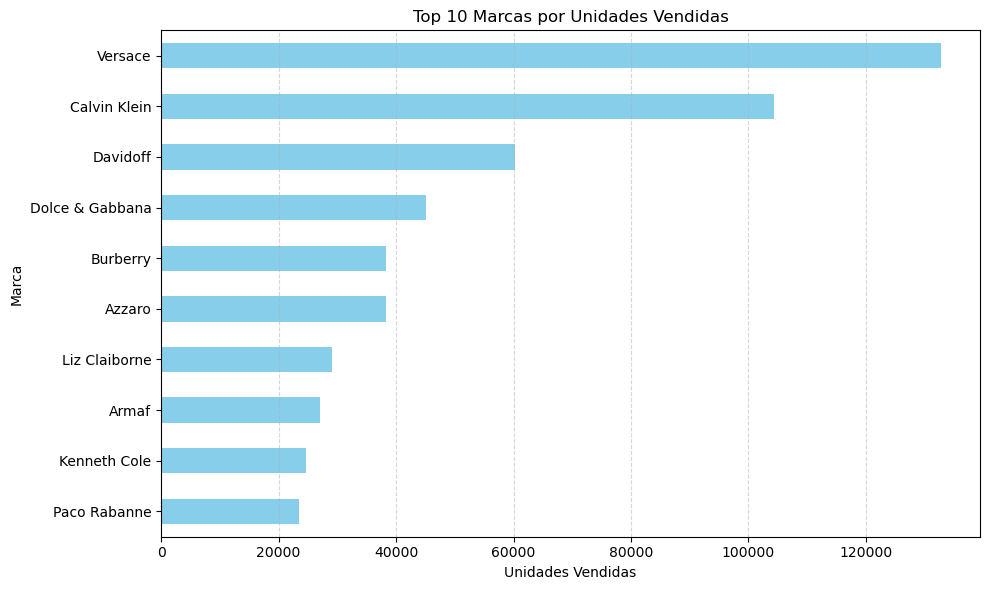

In [30]:
# Agrupar por marca y sumar las unidades vendidas
top_brands = df.groupby('brand')['sold'].sum().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
top_brands.sort_values().plot(kind='barh', color='skyblue')  # ordena de menor a mayor para el eje Y
plt.xlabel('Unidades Vendidas')
plt.ylabel('Marca')
plt.title('Top 10 Marcas por Unidades Vendidas')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 🏆 Marcas Más Vendidas (por cantidad de ventas)

Se construyó un gráfico de barras para identificar qué marcas poseen mayor volumen de ventas en el catálogo. Los resultados fueron los siguientes:

- **Versace** lidera con más de **120,000 unidades vendidas**, destacándose como la marca más popular.
- **Calvin Klein** ocupa el segundo lugar con más de **100,000 ventas**.
- **Davidoff** se posiciona en tercer lugar con **aproximadamente 60,000 ventas**.

Este análisis revela una clara preferencia del consumidor por marcas de alto reconocimiento internacional.


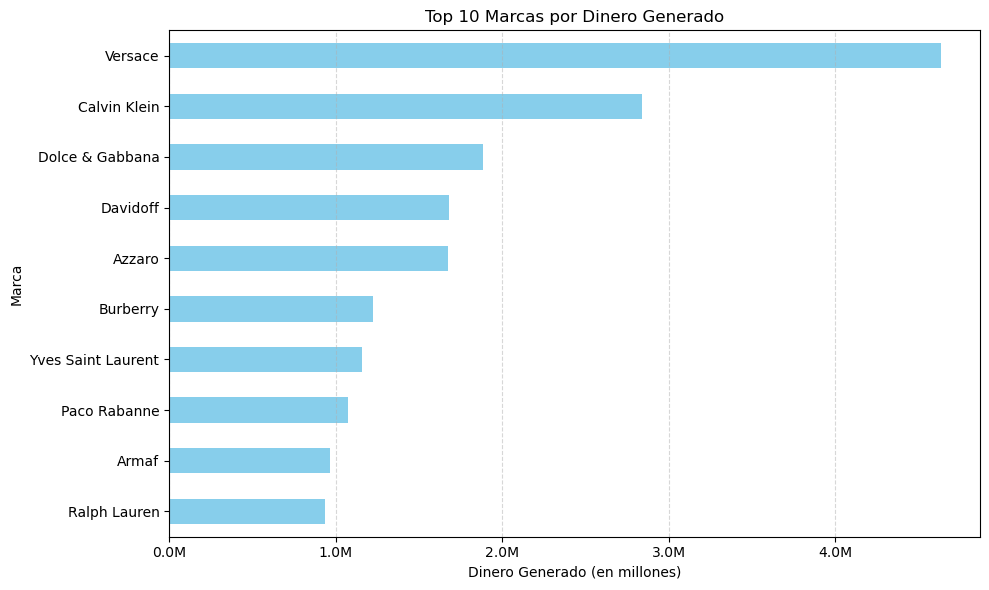

In [32]:
# Agrupar por marca y sumar las unidades vendidas
top_brands = df.groupby('brand')['sales_amount'].sum().sort_values(ascending=False).head(10)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
ax = top_brands.sort_values().plot(kind='barh', color='skyblue')  # eje Y ordenado

plt.xlabel('Dinero Generado (en millones)')
plt.ylabel('Marca')
plt.title('Top 10 Marcas por Dinero Generado')
plt.grid(axis='x', linestyle='--', alpha=0.5)

# Aplicar formato M al eje X
ax.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.tight_layout()
plt.show()




### 💰 Marcas que Generan Más Ingresos

Al realizar un gráfico de barras sobre el dinero generado por marca, se obtuvieron los siguientes resultados:

- **Versace** nuevamente encabeza la lista, generando más de **4 millones de dólares**.
- **Calvin Klein** ocupa el segundo lugar con **2.7 millones**.
- **Dolce & Gabbana** se posiciona en tercer lugar con **1.8 millones**.

Esto evidencia no solo volumen de ventas, sino también una estrategia de precios efectiva en estas marcas premium.


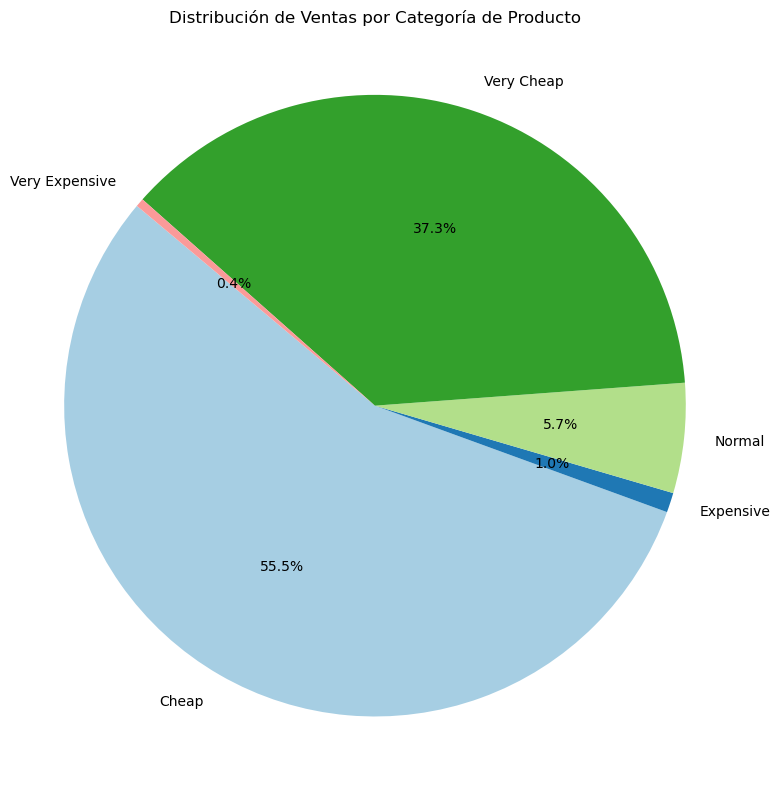

In [34]:
# Agrupar por categoría y sumar las unidades vendidas
category_sales = df.groupby('Price Category')['sales_amount'].sum()

# Crear gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(
    category_sales,
    labels=category_sales.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Paired.colors  # puedes cambiar el colormap si deseas
)
plt.title('Distribución de Ventas por Categoría de Producto')
plt.axis('equal')  # para que el pastel sea circular
plt.tight_layout()
plt.show()

### 🧾 Impacto del Rango de Precios en los Ingresos

A través de un gráfico de pastel se analizó qué rangos de precios aportan más ingresos:

- Los **productos baratos** (entre 31 y 80 dólares) generan **el 55.5% de las ganancias**.
- Los **productos muy baratos** (menos de 30 dólares) representan el **37.3%**.
- Los de **precio normal** (entre 81 y 150 dólares) apenas un **5.7%**.
- Los **productos caros** (151 a 220 dólares) aportan solo **1%**.
- Los **muy caros** (más de 221 dólares) generan **0.4%**.

Esto demuestra que, aunque los productos de lujo están en catálogo, el grueso de las ganancias proviene de perfumes accesibles, lo cual puede estar relacionado con una estrategia de volumen.


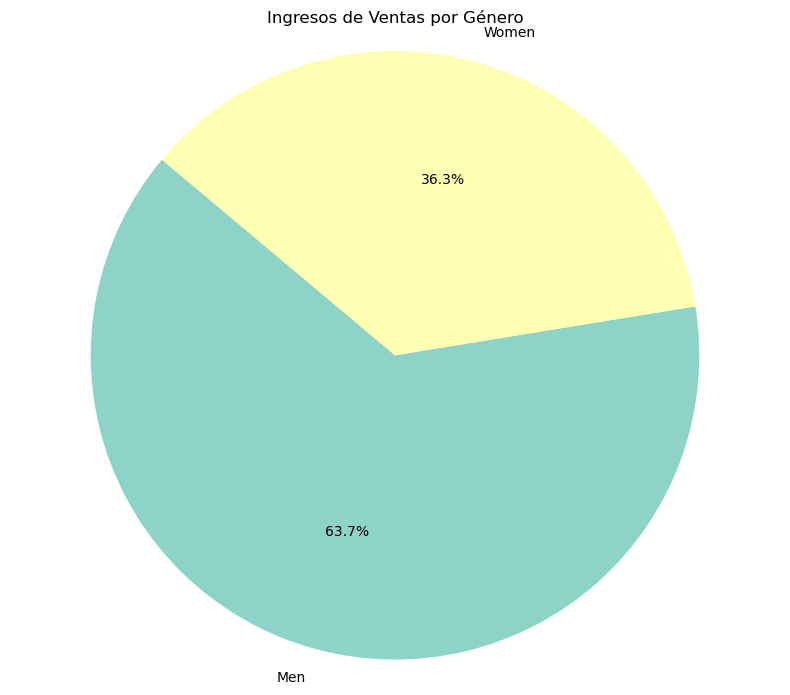

In [36]:
# Agrupar por género y sumar las ventas
ventas_por_genero = df.groupby('Gender')['sales_amount'].sum()

# Crear gráfico de pastel
plt.figure(figsize=(8, 7))
plt.pie(
    ventas_por_genero,
    labels=ventas_por_genero.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=plt.cm.Set3.colors
)
plt.title('Ingresos de Ventas por Género')
plt.axis('equal')  # Mantiene el círculo
plt.tight_layout()
plt.show()

### 🧑‍🤝‍🧑 Género de los Compradores

También se utilizó un gráfico de pastel para analizar el género de los compradores en relación con los ingresos generados:

- **Hombres**: representan el **63.7%** del dinero total generado.
- **Mujeres**: constituyen el **36.3%**.

Este hallazgo sugiere que los productos comercializados están mayormente orientados al público masculino o que este grupo presenta un mayor ticket promedio por compra.


In [38]:
df_agg = df.groupby('title').agg({
    'sales_amount': 'sum',
    'available': 'sum'
}).reset_index()


df_agg_zombie = df_agg.sort_values(['sales_amount', 'available'], ascending=[True, False])
top_10_zombie = df_agg_zombie.head(10)
top_10_estrella = df_agg.sort_values('sales_amount', ascending=False).head(10)

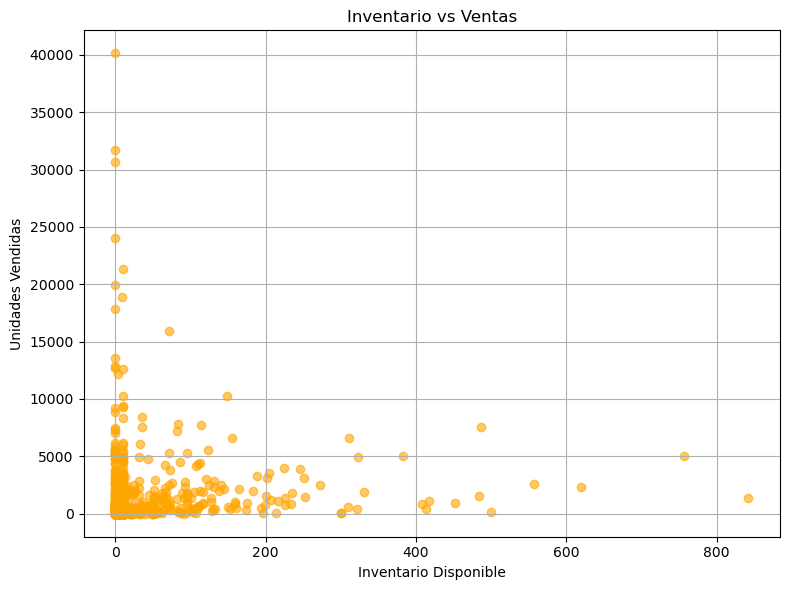

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(df['available'], df['sold'], alpha=0.6, c='orange')
plt.xlabel('Inventario Disponible')
plt.ylabel('Unidades Vendidas')
plt.title('Inventario vs Ventas')
plt.grid(True)
plt.tight_layout()
plt.show()


#### Se identificó: 
Hay productos con exceso de inventario que no se están vendiendo, que tienen muchos stocks y baja rotacion

Productos exitosos en riesgo: Algunos productos se están vendiendo mucho y podrían quedarse sin stock si no se reabastecen pronto.

In [41]:
top = df[['title', 'sales_amount']].sort_values('sales_amount', ascending=False).head(10)


In [42]:
top.head

<bound method NDFrame.head of                                                   title  sales_amount
44    Chrome by azzaro 6.7 / 6.8 oz edt cologne for ...    1420246.15
184   Versace eros by gianni versace 3.4 oz edt colo...    1261424.86
642   Cool water by davidoff 4.2 oz edt cologne for ...    1012479.90
188   Versace pour homme signature by versace 3.4 oz...     957671.40
57    Versace pour homme signature by versace 3.4 oz...     733875.12
76    Obsession by calvin klein 4.0 oz 4 men edt col...     566570.88
163   Cool water by davidoff cologne for men 6.7 / 6...     518113.76
1345  Escape by calvin klein edp perfume for women 3...     475987.64
242   1 million by paco rabanne 3.4 oz edt cologne f...     426007.23
1359  Vera wang perfume 3.3 / 3.4 oz edp for women s...     401399.25>

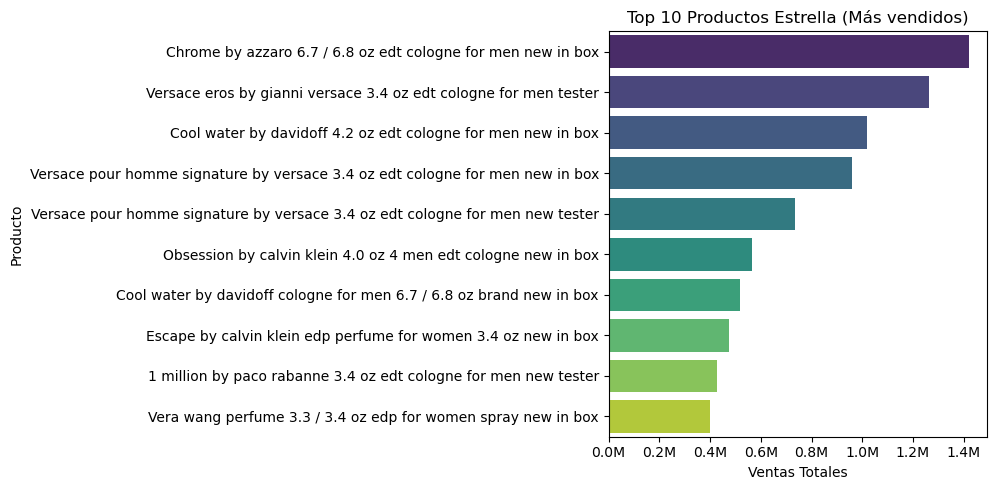

In [43]:

# 3. Top 10 productos zombie (menos vendidos y más inventario)
# Primero ordenamos por ventas ascendente (menos vendidos)
# Luego entre esos, seleccionamos los que tienen más inventario
df_agg_zombie = df_agg.sort_values(['sales_amount', 'available'], ascending=[True, False])
top_10_zombie = df_agg_zombie.head(10)

plt.figure(figsize=(14, 5))

# Gráfico 1: Productos estrella por ventas
plt.subplot(1, 2, 1)
ax1 = sns.barplot(data=top_10_estrella, x='sales_amount', y='title', palette='viridis')
plt.title('Top 10 Productos Estrella (Más vendidos)')
plt.xlabel('Ventas Totales')
plt.ylabel('Producto')

# Formatear eje X a millones con 'M'
ax1.xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1_000_000:.1f}M'))

plt.tight_layout()
plt.show()



### 📊 Insights del gráfico:

- **Chrome by Azzaro** lidera las ventas con una diferencia significativa, superando los **1.4 millones** en ventas totales.
- La **marca Versace** domina el ranking con **tres productos distintos** dentro del top 5, lo que indica una fuerte presencia en el mercado.
- **Cool Water de Davidoff** también destaca con **dos presentaciones** distintas entre los más vendidos.
- La mayoría de los productos son **colonias para hombres**, lo que sugiere una mayor rotación o demanda en ese segmento.
- Las versiones **"tester"** de algunas fragancias también se venden bien, lo que puede indicar una **preferencia por precios accesibles** o **clientes recurrentes** que no requieren presentación de lujo.
- El top 10 presenta una caída gradual en las ventas, con los productos en las últimas posiciones rondando los **400k a 600k**.

In [45]:
# Ver productos que menos han generado ganancia y su stock
top_10_zombie.head(10)

,title,sales_amount,available
105,Alexandria fragrances: black panther inspired ...,12.00,39.0
996,Kuromi perfume,15.00,4.0
823,Hanae mori him men’s eau de toilette 10 sprays...,15.39,5.0
376,Chanel coco mademoiselle eau de parfum sample...,16.99,3.0
499,D&g dolce gabbana 3 l'imperatrice edt 1.5ml te...,17.97,5.0
1389,Perfume para hombre con feromonas de atraer mu...,17.99,13.0
625,"Elizabeth taylor perfume gift set, white diamo...",18.87,0.0
1702,Valentino donna born in roma eau de parfum 2m...,19.40,10.0
19,2 kilian good girl gone bad eau de parfum mini...,19.80,6.0
1720,Varens for men cafe vanille eau de toilette fo...,22.00,49.0


In [46]:
#Mostrar productos estrellas y ver su stock
top_10_estrella.head(10)

,title,sales_amount,available
388,Chrome by azzaro 6.7 / 6.8 oz edt cologne for ...,1420246.15,0.0
1747,Versace eros by gianni versace 3.4 oz edt colo...,1261424.86,0.0
459,Cool water by davidoff 4.2 oz edt cologne for ...,1019581.50,10.0
1766,Versace pour homme signature by versace 3.4 oz...,957671.40,10.0
1767,Versace pour homme signature by versace 3.4 oz...,733875.12,0.0
1292,Obsession by calvin klein 4.0 oz 4 men edt col...,566570.88,0.0
460,Cool water by davidoff cologne for men 6.7 / 6...,518113.76,0.0
644,Escape by calvin klein edp perfume for women 3...,475987.64,0.0
3,1 million by paco rabanne 3.4 oz edt cologne f...,426007.23,0.0
1721,Vera wang perfume 3.3 / 3.4 oz edp for women s...,401399.25,71.0


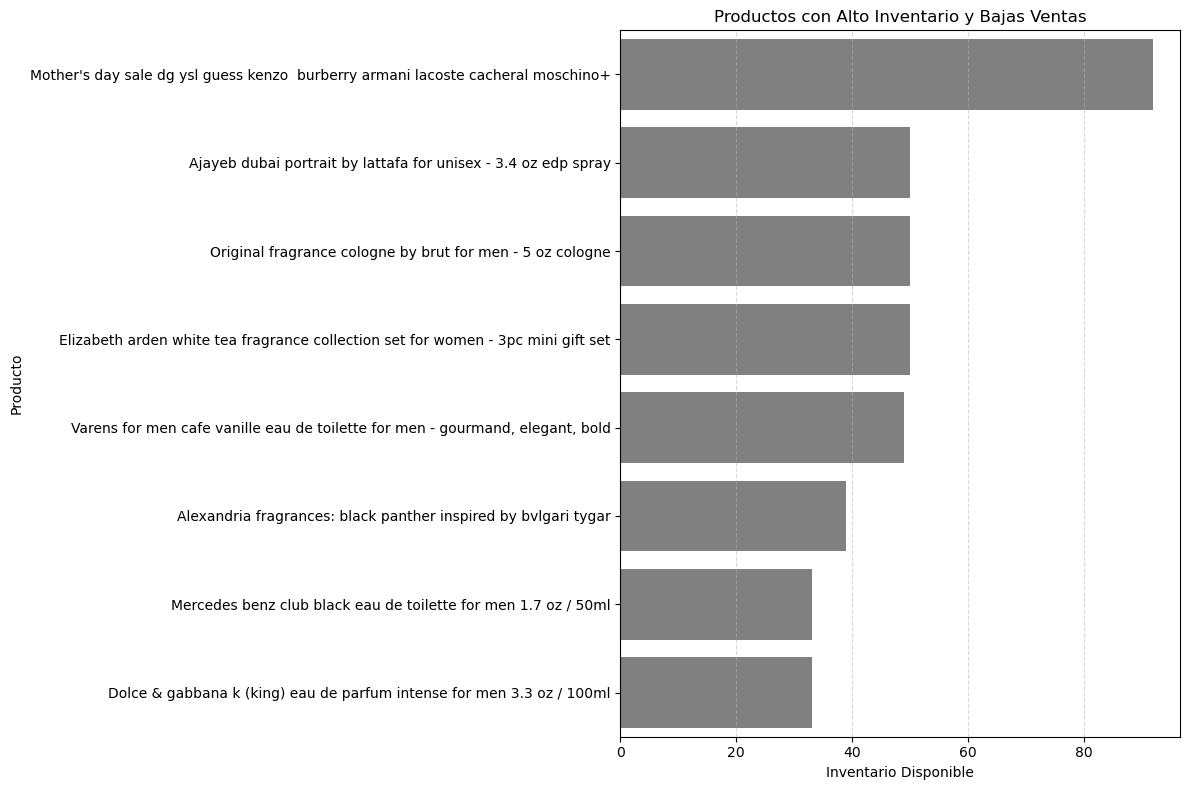

In [47]:
#Clasificar productos Zombies y Top 
# Zombies son los que tengan mas de 30 stocks y menos de 20 ventas
# Top aquellos que tengan menos de 10 stocks y mas de mil vendidos
zombies = df[(df['available'] > 30) & (df['sold'] < 20)]
Top_Product = df[(df['available'] < 10) & (df['sold'] > 1000)]

# Ordenar para que se vea mejor
zombies = zombies.sort_values('available', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=zombies, y='title', x='available', color='gray')
plt.title('Productos con Alto Inventario y Bajas Ventas')
plt.ylabel('Producto')
plt.xlabel('Inventario Disponible')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 🔍 Análisis de Productos con Alto Inventario y Bajas Ventas (Productos "Zombis")

Se identificaron productos con un **inventario considerablemente alto** pero con un volumen de ventas bajo (menos de 20 unidades vendidas). Este patrón indica **productos estancados** que requieren revisión urgente en términos de estrategia comercial y promoción.

- El producto que destaca como **prioritario** es **“Mother's Day Sale DG YSL”**, con más de **80 unidades disponibles** y menos de **20 ventas realizadas**, lo que lo convierte en el principal producto "zombi" del inventario.
- Otros productos que también presentan un comportamiento similar y deben analizarse para campañas promocionales, descuentos agresivos o descontinuación son:
  - **Ajayeb Dubai Portrait**
  - **Original Fragrance Cologne**
  - **Elizabeth Arden White Tea Fragrance**
  - **Varens for Men Café Vanille**

Todos estos presentan más de **40 unidades disponibles** y menos de **20 ventas**, lo que sugiere **baja rotación de inventario**.

> 📌 *Recomendación:* Evaluar el posicionamiento, precio, empaque o canal de venta de estos productos para evitar pérdidas por obsolescencia.

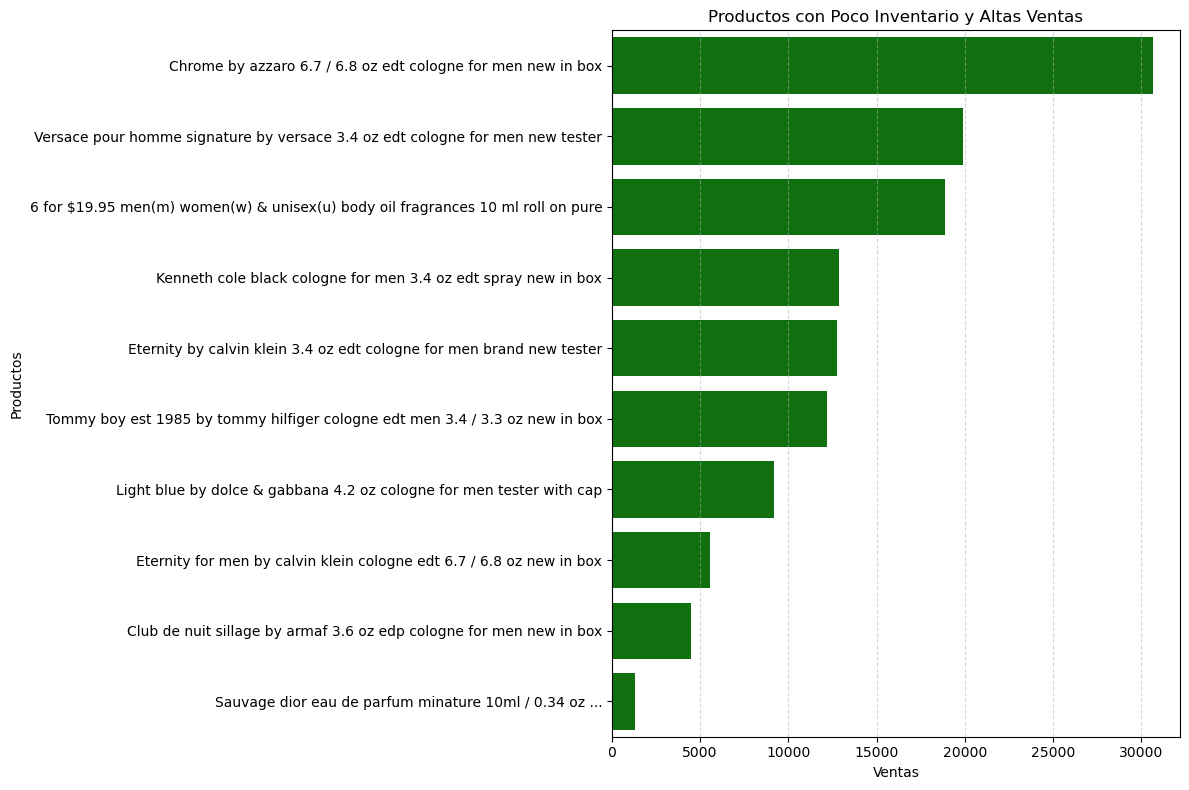

In [49]:
top10products= Top_Product.head(10)

# Ordenar para que se vea mejor
top10products = top10products.sort_values('sold', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(data=top10products, y='title', x='sold', color='green')
plt.title('Productos con Poco Inventario y Altas Ventas')
plt.ylabel('Productos')
plt.xlabel('Ventas')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## 📈 Análisis de Productos con Altas Ventas y Bajo Inventario (Productos Críticos en Stock)

Se detectaron productos con **alta rotación** y **stock limitado**, lo cual representa una oportunidad de mejora en el control de inventario y reabastecimiento.

- El producto **más destacado** es **“Chrome by Azzaro 6.7 oz Men”**, con más de **30,000 unidades vendidas** y solo **menos de 20 unidades disponibles**. Es prioritario **reabastecerlo cuanto antes** para no perder oportunidades de venta.
- Otros productos relevantes que también requieren atención urgente por su alta demanda y bajo inventario son:
  - **Versace Pour Homme 3.4 oz**
  - **Oferta de 6 perfumes por $19**

Ambos han generado aproximadamente **40,000 ventas en conjunto**, y tienen **menos de 40 unidades disponibles**.

> 📌 *Recomendación:* Priorizar la reposición de estos productos e incluso considerar ampliar su promoción, ya que son **claves en la rentabilidad del catálogo**.

# Conclusión del Análisis

El análisis del conjunto de datos revela que la mayoría de las ganancias provienen de productos de bajo costo, especialmente aquellos entre 31 y 80 dolares, los cuales representan más de la mitad de los ingresos. En contraste, los productos más caros tienen una contribución mínima a las ganancias, lo que sugiere baja rotación o demanda limitada en esos segmentos.

También se identificaron productos que generan altos ingresos pero tienen niveles de inventario bajos. Estos productos son estratégicamente importantes, ya que representan oportunidades de crecimiento inmediato si se optimiza su disponibilidad. Su baja existencia actual puede estar limitando mayores ingresos.

Por otro lado, se observaron productos con inventario alto pero con ventas muy bajas, lo que representa un riesgo de sobrestock y capital detenido.

## Recomendaciones

- **Priorizar la reposición de productos top con alto nivel de ingresos y bajo inventario**, para evitar pérdidas por quiebres de stock y aprovechar su alta rotación.
- Enfocar estrategias de marketing y promociones en productos con precios entre **31 y 80 dolares**, ya que son los que generan mayor retorno económico.
- Reevaluar el portafolio de productos caros, ya que su impacto en ingresos es mínimo. Pueden eliminarse, reposicionarse o agruparse en ofertas especiales.
- Aplicar **descuentos, paquetes o liquidaciones** para productos con alto inventario y bajas ventas, reduciendo pérdidas y liberando espacio logístico.
- Realizar un monitoreo mensual de inventarios, ventas y márgenes por producto, para tomar decisiones más ágiles y basadas en datos.
- Considerar introducir más productos en el rango de precio medio, ampliando la oferta en el segmento más rentable.
